In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


show_id 编号

type 类型（Movie/TV Show）

title 名称

director 导演

cast 演员

country 国家或地区

date_added 播放日期

release_year 发行年份

rating 限制级别

duration 时长

listed_in 类别

description 描述

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 447.3+ KB


In [4]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


### 空值填充

In [5]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

df['cast'].replace(np.nan,'No Data',inplace = True)
df['director'].replace(np.nan,'No Data', inplace =True)

#Drops
df.dropna(inplace=True)

#Drop Duplicates(same values)
df.drop_duplicates(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 515.0+ KB


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

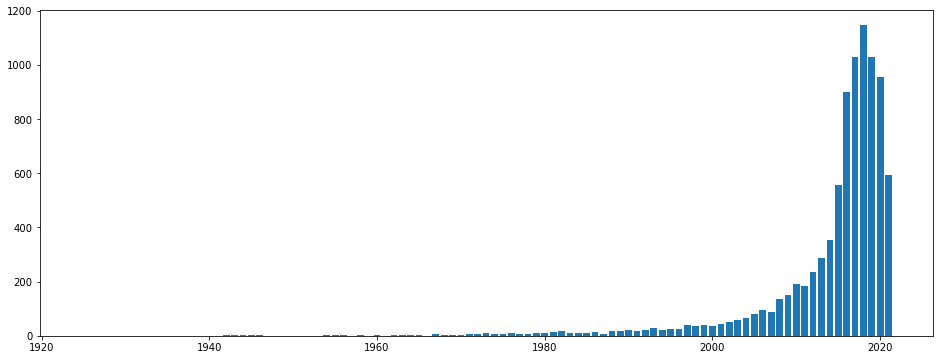

In [8]:
data = df['release_year'].value_counts().sort_index(ascending=False)
fig,ax = plt.subplots(figsize=(16,6))
ax.bar(data.index, data.values)
plt.show()

### 2000年后，电影和电视越来越流行

In [9]:
#增加月份和年份日期列
df["date_added"] = pd.to_datetime(df['date_added'])

df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021


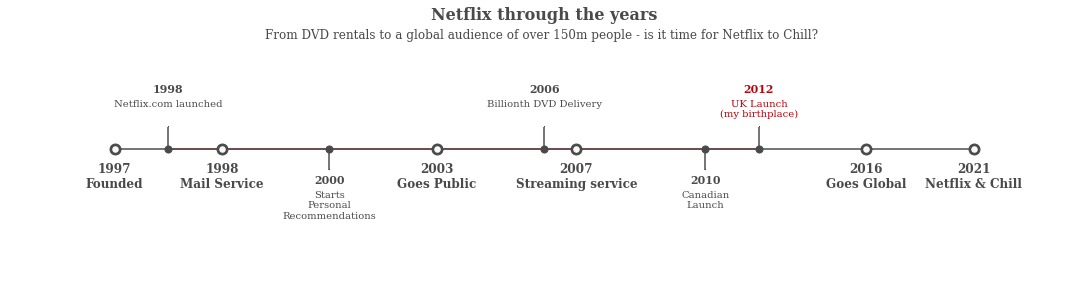

In [11]:
from datetime import datetime

## these go on the numbers below
tl_dates = [
    "1997\nFounded",
    "1998\nMail Service",
    "2003\nGoes Public",
    "2007\nStreaming service",
    "2016\nGoes Global",
    "2021\nNetflix & Chill"
]

tl_x = [1, 2, 4, 5.3, 8,9]

## these go on the numbers
tl_sub_x = [1.5,3,5,6.5,7]


tl_sub_times = [
    "1998","2000","2006","2010","2012"
]

tl_text = [
    "Netflix.com launched",
    "Starts\nPersonal\nRecommendations","Billionth DVD Delivery","Canadian\nLaunch","UK Launch\n(my birthplace)"]



# Set figure & Axes
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 10)


# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.9, c='#4a4a4a', zorder=1)


# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
# Timeline : Time Points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a',zorder=4)

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a',fontsize=12)
    

# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))    
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)    
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

# Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710', fontsize=11)
    
    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center', 
        fontfamily='serif',color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710')



# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks    
ax.set_xticks([]) 
ax.set_yticks([]) 

# Title
ax.set_title("Netflix through the years", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')
ax.text(2.4,1.57,"From DVD rentals to a global audience of over 150m people - is it time for Netflix to Chill?", fontfamily='serif', fontsize=12, color='#4a4a4a')

plt.show()

### 由于2000年以前，数据较少，可不做分析

In [12]:
df = df.loc[(df.release_year <= 2020) & (df.release_year >= 2000)]

In [13]:
tv_table = df[df['type'] == 'TV Show']
mv_table = df[df['type'] == 'Movie']

<function matplotlib.pyplot.show(close=None, block=None)>

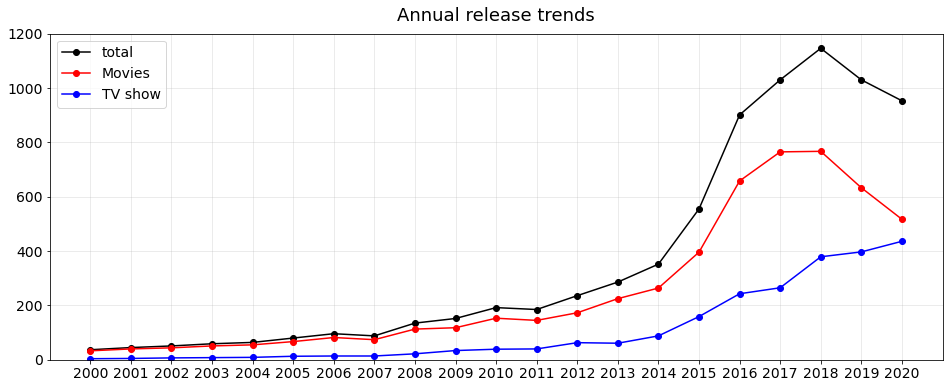

In [14]:
tv = tv_table['release_year'].value_counts()
mv = mv_table['release_year'].value_counts()
pubNum = pd.concat([tv, mv], axis=1, keys=['tv','mv'])

fig, ax = plt.subplots(figsize=(16,6))
ax.plot(pubNum.index, pubNum['tv']+pubNum['mv'], label="total", marker='o', color='black')
ax.plot(pubNum.index, pubNum['mv'], label="Movies", marker='o', color='red')
ax.plot(pubNum.index, pubNum['tv'], label="TV show", marker='o', color='blue')
ax.legend(fontsize=14)
ax.set_xticks(range(2000,2021))
plt.tick_params(labelsize=14)
ax.grid(alpha=0.3)
ax.set_ylim(0,1200)
ax.set_title('Annual release trends', y=1.02, fontsize=18)
ax.set_xlabel('', fontsize=16)
ax.set_ylabel('', fontsize=16)
plt.show

In [15]:
df['count'] = 1

# Many productions have several countries listed - this will skew our results , we'll grab the first one mentioned

# Lets retrieve just the first country
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country'].head()

# Rating ages from this notebook: https://www.kaggle.com/andreshg/eda-beginner-to-expert-plotly (thank you!)

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

# Genre

df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

# Reducing name length

df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)
df['first_country'].replace('South Korea', 'S. Korea',inplace=True)

C:\user/ipykernel_4400/1510786299.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_country.index, fontfamily='serif', rotation=0)


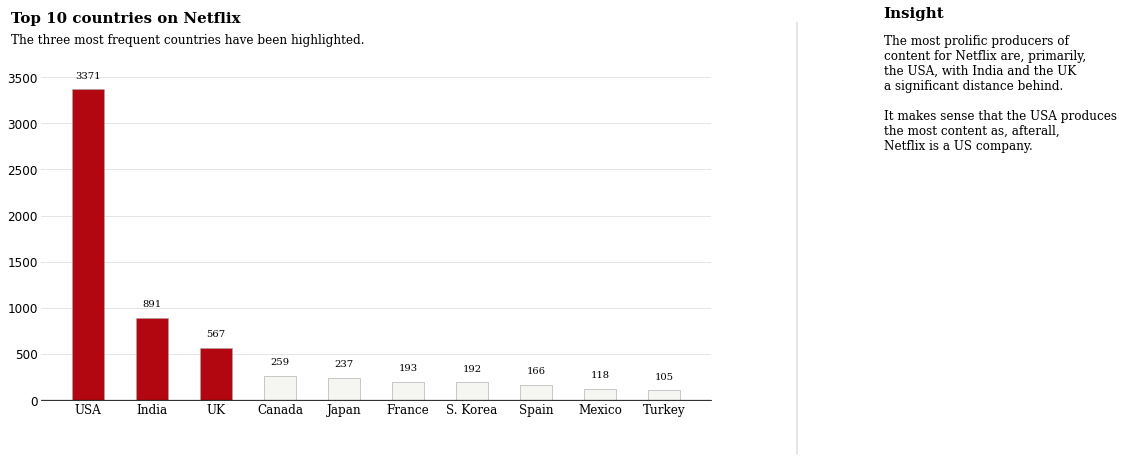

In [16]:
data_country = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

# Plot

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data_country.index, data_country, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data_country.index:
    ax.annotate(f"{data_country[i]}", 
                   xy=(i, data_country[i] + 150), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')
    
# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data_country.index, fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.09, 1, 'Top 10 countries on Netflix', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The three most frequent countries have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.67, '''
The most prolific producers of
content for Netflix are, primarily,
the USA, with India and the UK
a significant distance behind.

It makes sense that the USA produces 
the most content as, afterall, 
Netflix is a US company.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)  

grid_y_ticks = np.arange(0, 4000, 500) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels

#plt.xlabel("Country", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
#plt.ylabel("Count", fontsize=12, fontweight='light', fontfamily='serif')
 #plt.legend(loc='upper right')
    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

### 电影上映最多的国家是美国，远远超过印度、英国等国家，这也是因为netflix是一家美国的公司

C:\user/ipykernel_4400/739678589.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)


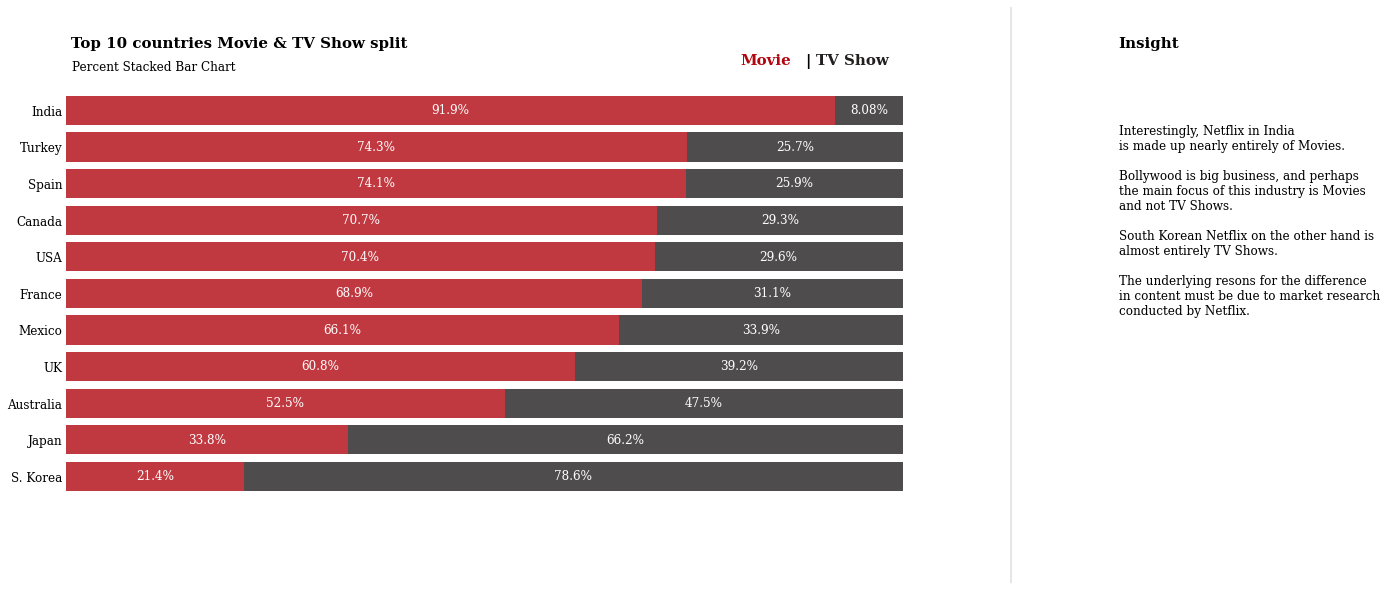

In [17]:
country_order = df['first_country'].value_counts()[:11].index
data_q2q3 = df[['type', 'first_country']].groupby('first_country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

###
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='#221f1f', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# male percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


fig.text(1.1, 0.93, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.44, '''
Interestingly, Netflix in India
is made up nearly entirely of Movies. 

Bollywood is big business, and perhaps
the main focus of this industry is Movies
and not TV Shows.

South Korean Netflix on the other hand is 
almost entirely TV Shows.

The underlying resons for the difference 
in content must be due to market research
conducted by Netflix.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')



import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])




ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()


有趣的是，Netflix 在印度几乎完全由电影组成。

宝莱坞是大生意，也许这个行业的主要焦点是电影而不是电视节目。

另一方面，韩国 Netflix 是几乎完全是电视节目。

In [18]:
order = pd.DataFrame(df.groupby('rating')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['rating'])

C:\user/ipykernel_4400/2181436096.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(mf.columns, fontfamily='serif')


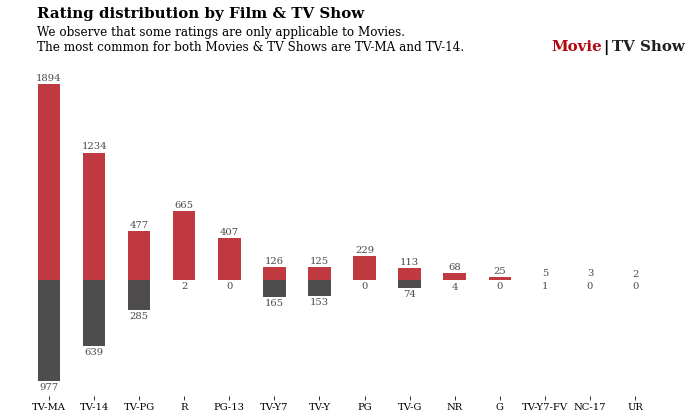

In [19]:
mf = df.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]

movie = mf.loc['Movie']
tv = - mf.loc['TV Show']


fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.5, color='#b20710', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='#221f1f', alpha=0.8, label='TV Show')
#ax.set_ylim(-35, 50)

# Annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')   

for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
    
 

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(mf.columns, fontfamily='serif')
ax.set_yticks([])    

ax.legend().set_visible(False)
fig.text(0.16, 1, 'Rating distribution by Film & TV Show', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.16, 0.89, 
'''We observe that some ratings are only applicable to Movies. 
The most common for both Movies & TV Shows are TV-MA and TV-14.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.755,0.924,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.815,0.924,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.825,0.924,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

plt.show()

我们观察到某些评级仅适用于电影。
电影和电视节目最常见的是 TV-MA 和 TV-14